In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
import cv2
from random import shuffle
from tqdm import tqdm
from PIL import Image

In [2]:
Train_Cats = "/content/drive/MyDrive/archive/dataset/training_set/cats"
Train_Dogs = "/content/drive/MyDrive/archive/dataset/training_set/dogs"
Test_Cats = "/content/drive/MyDrive/archive/dataset/test_set/cats"
Test_Dogs = "/content/drive/MyDrive/archive/dataset/test_set/dogs"

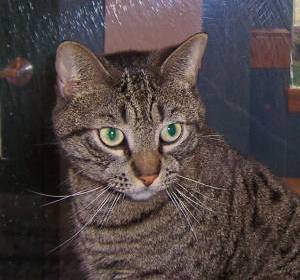

In [3]:
# Train cat image
Image.open("/content/drive/MyDrive/archive/dataset/training_set/cats/cat.1.jpg")

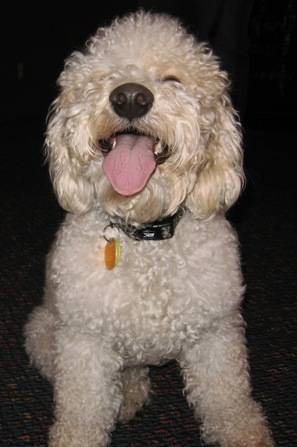

In [4]:
#test dog image
Image.open("/content/drive/MyDrive/archive/dataset/test_set/dogs/dog.4003.jpg")

100%|██████████| 4000/4000 [01:34<00:00, 42.20it/s] 


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

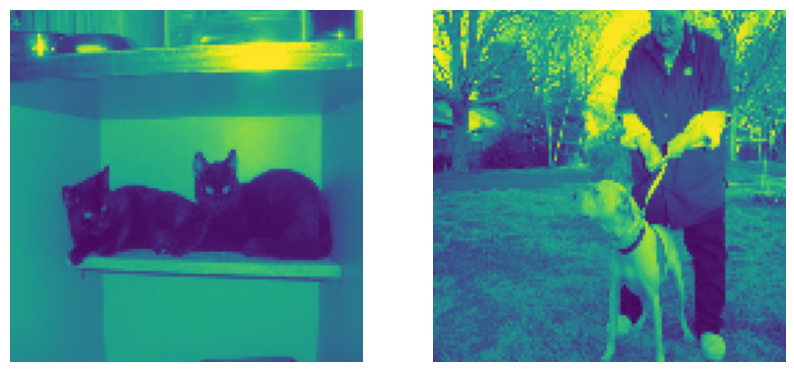

In [5]:
image_size = 128
for image1 in tqdm(os.listdir(Train_Cats)):
    path = os.path.join(Train_Cats, image1)
    img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img1 = cv2.resize(img1, (image_size, image_size)).flatten()
    np_img1 = np.asarray(img1)

for image2 in tqdm(os.listdir(Train_Dogs)):
    path = os.path.join(Train_Dogs, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.resize(img2, (image_size, image_size)).flatten()
    np_img2 = np.asarray(img2)

plt.figure(figsize = (10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img1.reshape(image_size, image_size))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis("off")

In [6]:
def train_data():
    train_data_cats = []
    train_data_dogs = []

    for image1 in tqdm(os.listdir(Train_Cats)):
        path = os.path.join(Train_Cats, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_cats.append(img1)

    for image2 in tqdm(os.listdir(Train_Dogs)):
        path2 = os.path.join(Train_Dogs, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_dogs.append(img2)

    train_data = np.concatenate((np.asarray(train_data_cats), np.asarray(train_data_dogs)), axis = 0)

    return train_data

In [12]:
def test_data():
    test_data_cats = []
    test_data_dogs = []

    for image1 in tqdm(os.listdir(Test_Cats)):
        path = os.path.join(Test_Cats, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_cats.append(img1)

    for image2 in tqdm(os.listdir(Test_Dogs)):
        path2 = os.path.join(Test_Dogs, image2)
        img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_dogs.append(img2)

    test_data= np.concatenate((np.asarray(test_data_cats),np.asarray(test_data_dogs)),axis=0)

    return test_data

In [8]:
train_data = train_data()
test_data = test_data()

100%|██████████| 1020/1020 [00:38<00:00, 26.84it/s] 


In [9]:
X_data = np.concatenate((train_data, test_data), axis = 0)
X_data = (X_data - np.min(X_data))/(np.max(X_data) - np.min(X_data))

In [10]:
z1 = np.zeros(4000)
o1 = np.ones(4000)
Y_train = np.concatenate((o1, z1), axis = 0)
z = np.zeros(1000)
o = np.ones(1000)
Y_test = np.concatenate((o, z), axis = 0)

In [14]:
Y_data = np.concatenate((Y_train, Y_test), axis = 0)

In [15]:
print("X shape: ", X_data.shape)
print("Y shape: ", Y_data.shape)

X shape:  (10020, 128, 128)
Y shape:  (10000,)


In [20]:
# ✅ Step 1: Ensure matching lengths
if X_data.shape[0] != Y_data.shape[0]:
    min_len = min(len(X_data), len(Y_data))
    X_data = X_data[:min_len]
    Y_data = Y_data[:min_len]

# ✅ Step 2: Train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X_data, Y_data, test_size=0.15, random_state=42
)

# ✅ Step 3: Optional - Print to confirm
print("Training samples:", x_train.shape[0])
print("Testing samples:", x_test.shape[0])


Training samples: 8500
Testing samples: 1500


In [22]:
# Ensure shape match
if X_data.shape[0] != Y_data.shape[0]:
    min_len = min(len(X_data), len(Y_data))
    X_data = X_data[:min_len]
    Y_data = Y_data[:min_len]

# Train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X_data, Y_data, test_size=0.15, random_state=42
)

# Define counts
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

# Flatten input data
x_train_flatten = x_train.reshape(number_of_train, -1)
x_test_flatten = x_test.reshape(number_of_test, -1)

# Confirm shape
print("X train flatten", x_train_flatten.shape)
print("X test flatten", x_test_flatten.shape)


X train flatten (8500, 16384)
X test flatten (1500, 16384)


In [23]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 8500)
x test:  (16384, 1500)
y train:  (8500,)
y test:  (1500,)


In [38]:
# initialize parameters and layers sizes
# I arrange the weight and bias values.
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1" : np.random.randn(3,x_train.shape[0]) * 0.1,
                 "bias1" : np.zeros((3,1)),
                 "weight2" : np.random.randn(y_train.shape[0], 3) *0.1,
                 "bias2" : np.zeros((y_train.shape[0],1))}
    return parameters

# Sigmoid function
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

# forward propagation
# I calculate variables z1,a1,z2,a2 using x_train.
# Z1 and A1 values are the first steps of the ANN model.
# In the first step, I calculate Z1 and A1 values.
# In the second step, I calculate Z2 and A2 values.
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"], x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"], A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1" : Z1,
            "A1" : A1,
            "Z2" : Z2,
            "A2" : A2}

    return A2, cache

# compute cost
# I calculate error values.
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs) / Y.shape[1]
    return cost

# backward propagation
# I do this step to update weight and bias values.
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2, cache["A1"].T) / X.shape[1]
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T, dZ2) * (1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]

    grads = {"dweight1" : dW1,
            "dbias1" : db1,
            "dweight2" : dW2,
            "dbias2" : db2}

    return grads

# update
# I update the weight and bias values.
def update_parameters_NN(parameters, grads, learning_rate):
    parameters = {"weight1" : parameters["weight1"] - learning_rate * grads["dweight1"],
                 "bias1" : parameters["bias1"] - learning_rate * grads["dbias1"],
                 "weight2" : parameters["weight2"] - learning_rate * grads["dweight2"],
                 "bias2" : parameters["bias2"] - learning_rate * grads["dbias2"]}
    return parameters

# prediction
# I estimate in this step.
def predict_NN(parameters, x_test):

    A2, cache = forward_propagation_NN(x_test, parameters)
    Y_prediction = np.zeros((1, x_test.shape[1]))

    for i in range(A2.shape[1]):
        if A2[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# Artificial Neural Network ANN
# I will use the functions I prepared inside this ANN function.
def two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations, learning_rate):
    cost_list = []
    index_list = []

    # initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        # forward propagation
        A2, cache = forward_propagation_NN(x_train, parameters)

        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)

        # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)

        # update parameters
        parameters = update_parameters_NN(parameters, grads, learning_rate)

        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print("Cost after iteration %i: %f" %(i, cost))

    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation = "vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    # predict
    y_prediction_test = predict_NN(parameters, x_test)
    y_prediction_train = predict_NN(parameters, x_train)

    # print
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Fix mismatch in sample sizes
if X_data.shape[0] != Y_data.shape[0]:
    min_len = min(len(X_data), len(Y_data))
    X_data = X_data[:min_len]
    Y_data = Y_data[:min_len]

# Step 2: Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X_data, Y_data, test_size=0.15, random_state=42
)

# Step 3: Reshape targets to be (1, m)
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

# Step 4: Flatten inputs if they are images or multi-dimensional
if x_train.ndim == 3:  # e.g., images
    x_train = x_train.reshape(x_train.shape[0], -1).T  # shape (n_x, m)
    x_test = x_test.reshape(x_test.shape[0], -1).T
else:
    x_train = x_train.T  # shape (n_x, m)
    x_test = x_test.T

# Step 5: Define neural network functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

def forward_propagation(X, parameters):
    W1, b1, W2, b2 = parameters.values()
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cache = {"A1": A1, "A2": A2}
    return A2, cache

def compute_cost_NN(A2, Y):
    m = Y.shape[1]
    cost = -np.sum(np.multiply(Y, np.log(A2)) + np.multiply(1 - Y, np.log(1 - A2))) / m
    return np.squeeze(cost)

def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m)


In [39]:
# initialize parameters and layers sizes
# I arrange the weight and bias values.
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1" : np.random.randn(3,x_train.shape[0]) * 0.1,
                 "bias1" : np.zeros((3,1)),
                 "weight2" : np.random.randn(y_train.shape[0], 3) *0.1,
                 "bias2" : np.zeros((y_train.shape[0],1))}
    return parameters

# Sigmoid function
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

# forward propagation
# I calculate variables z1,a1,z2,a2 using x_train.
# Z1 and A1 values are the first steps of the ANN model.
# In the first step, I calculate Z1 and A1 values.
# In the second step, I calculate Z2 and A2 values.
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"], x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"], A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1" : Z1,
            "A1" : A1,
            "Z2" : Z2,
            "A2" : A2}

    return A2, cache

# compute cost
# I calculate error values.
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs) / Y.shape[1]
    return cost

# backward propagation
# I do this step to update weight and bias values.
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2, cache["A1"].T) / X.shape[1]
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T, dZ2) * (1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]

    grads = {"dweight1" : dW1,
            "dbias1" : db1,
            "dweight2" : dW2,
            "dbias2" : db2}

    return grads

# update
# I update the weight and bias values.
def update_parameters_NN(parameters, grads, learning_rate):
    parameters = {"weight1" : parameters["weight1"] - learning_rate * grads["dweight1"],
                 "bias1" : parameters["bias1"] - learning_rate * grads["dbias1"],
                 "weight2" : parameters["weight2"] - learning_rate * grads["dweight2"],
                 "bias2" : parameters["bias2"] - learning_rate * grads["dbias2"]}
    return parameters

# prediction
# I estimate in this step.
def predict_NN(parameters, x_test):

    A2, cache = forward_propagation_NN(x_test, parameters)
    Y_prediction = np.zeros((1, x_test.shape[1]))

    for i in range(A2.shape[1]):
        if A2[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# Artificial Neural Network ANN
# I will use the functions I prepared inside this ANN function.
def two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations, learning_rate):
    cost_list = []
    index_list = []

    # initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        # forward propagation
        A2, cache = forward_propagation_NN(x_train, parameters)

        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)

        # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)

        # update parameters
        parameters = update_parameters_NN(parameters, grads, learning_rate)

        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print("Cost after iteration %i: %f" %(i, cost))

    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation = "vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    # predict
    y_prediction_test = predict_NN(parameters, x_test)
    y_prediction_train = predict_NN(parameters, x_train)

# initialize parameters and layers sizes
# I arrange the weight and bias values.
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1" : np.random.randn(3,x_train.shape[0]) * 0.1,
                 "bias1" : np.zeros((3,1)),
                 "weight2" : np.random.randn(y_train.shape[0], 3) *0.1,
                 "bias2" : np.zeros((y_train.shape[0],1))}
    return parameters

# Sigmoid function
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

# forward propagation
# I calculate variables z1,a1,z2,a2 using x_train.
# Z1 and A1 values are the first steps of the ANN model.
# In the first step, I calculate Z1 and A1 values.
# In the second step, I calculate Z2 and A2 values.
def forward_propagation_NN(x_train, parameters):
    Z1 = np.dot(parameters["weight1"], x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"], A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1" : Z1,
            "A1" : A1,
            "Z2" : Z2,
            "A2" : A2}

    return A2, cache

# compute cost
# I calculate error values.
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs) / Y.shape[1]
    return cost

# backward propagation
# I do this step to update weight and bias values.
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2, cache["A1"].T) / X.shape[1]
    db2 = np.sum(dZ2, axis = 1, keepdims = True) / X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T, dZ2) * (1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / X.shape[1]

    grads = {"dweight1" : dW1,
            "dbias1" : db1,
            "dweight2" : dW2,
            "dbias2" : db2}

    return grads

# update
# I update the weight and bias values.
def update_parameters_NN(parameters, grads, learning_rate):
    parameters = {"weight1" : parameters["weight1"] - learning_rate * grads["dweight1"],
                 "bias1" : parameters["bias1"] - learning_rate * grads["dbias1"],
                 "weight2" : parameters["weight2"] - learning_rate * grads["dweight2"],
                 "bias2" : parameters["bias2"] - learning_rate * grads["dbias2"]}
    return parameters

# prediction
# I estimate in this step.
def predict_NN(parameters, x_test):

    A2, cache = forward_propagation_NN(x_test, parameters)
    Y_prediction = np.zeros((1, x_test.shape[1]))

    for i in range(A2.shape[1]):
        if A2[0,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# Artificial Neural Network ANN
# I will use the functions I prepared inside this ANN function.
def two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations, learning_rate):
    cost_list = []
    index_list = []

    # initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        # forward propagation
        A2, cache = forward_propagation_NN(x_train, parameters)

        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)

        # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)

        # update parameters
        parameters = update_parameters_NN(parameters, grads, learning_rate)

        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print("Cost after iteration %i: %f" %(i, cost))

    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation = "vertical")
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    # predict
    y_prediction_test = predict_NN(parameters, x_test)
    y_prediction_train = predict_NN(parameters, x_train)

    # print
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters